In [164]:
import tensorflow as tf
import numpy as np

In [165]:
#>>>>>>>>>>>>>>>>>1、基础知识>>>>>>>>>>>>>>>>>>>>>>>>>
#张量是具有统一类型（称为 dtype）的多维数组.您可以在 tf.dtypes.DType 中查看所有支持的 dtypes。
#如果您熟悉 NumPy，就会知道张量与 np.arrays 有一定的相似性。
#就像 Python 数值和字符串一样，所有张量都是不可变的：永远无法更新张量的内容，只能创建新的张量。


In [166]:
#下面是一个“标量”（或称“0 秩”张量）。标量包含单个值，但没有“轴”。
# This will be an int32 tensor by default; see "dtypes" below.
rank_0_tensor = tf.constant(4)
print(rank_0_tensor)

tf.Tensor(4, shape=(), dtype=int32)


In [167]:
#“向量”（或称“1 秩”张量）就像一个值列表。向量有 1 个轴：
# Let's make this a float tensor.
rank_1_tensor = tf.constant([2.0,3.0,4.0])
print(rank_1_tensor)

tf.Tensor([2. 3. 4.], shape=(3,), dtype=float32)


In [168]:
#“矩阵”（或称“2 秩”张量）有 2 个轴：
# If you want to be specific, you can set the dtype (see below) at creation time
rank_2_tensor = tf.constant(
    [[1,2],
    [3,4],
    [5,6]],dtype=tf.float16)

print(rank_2_tensor)


tf.Tensor(
[[1. 2.]
 [3. 4.]
 [5. 6.]], shape=(3, 2), dtype=float16)


In [169]:
#张量的轴可能更多，下面是一个包含 3 个轴的张量：
# There can be an arbitrary number of
# axes (sometimes called "dimensions")
rank_3_tensor = tf.constant(
    [
        [[1,2,3],[4,5,6]],
        [[7,8,9],[10,11,12]],
        ], dtype=tf.int16
)
print(rank_3_tensor)

tf.Tensor(
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]], shape=(2, 2, 3), dtype=int16)


In [170]:
#通过使用 np.array 或 tensor.numpy 方法，您可以将张量转换为 NumPy 数组：
np.array(rank_2_tensor)

array([[1., 2.],
       [3., 4.],
       [5., 6.]], dtype=float16)

In [171]:
rank_2_tensor.numpy()

array([[1., 2.],
       [3., 4.],
       [5., 6.]], dtype=float16)

In [172]:
#张量通常包含浮点型和整型数据，但是还有许多其他数据类型，包括：
#复杂的数值
#字符串
#您可以对张量执行基本数学运算，包括加法、逐元素乘法和矩阵乘法。

a = tf.constant([
    [1,2,3],
    [4,5,6]
],dtype=tf.int32)

b = tf.constant([
    [7,8,9],
    [10,11,12]
],dtype=tf.int32)


print(tf.add(a,b),"\n")
print(tf.subtract(a,b),"\n")
print(tf.multiply(a,b),"\n")
print(tf.divide(a,b),"\n")



tf.Tensor(
[[ 8 10 12]
 [14 16 18]], shape=(2, 3), dtype=int32) 

tf.Tensor(
[[-6 -6 -6]
 [-6 -6 -6]], shape=(2, 3), dtype=int32) 

tf.Tensor(
[[ 7 16 27]
 [40 55 72]], shape=(2, 3), dtype=int32) 

tf.Tensor(
[[0.14285714 0.25       0.33333333]
 [0.4        0.45454545 0.5       ]], shape=(2, 3), dtype=float64) 



In [173]:
#各种运算都可以使用张量。
#tf.reduce_max 是 TensorFlow 中的一个函数，用于计算张量（tensor）中的最大值。它可以沿着张量的一个或多个维度进行操作。
a = tf.constant([
    [1,2,3,4,5],
    [6,7,8,9,10]
],dtype=tf.float32)

# Find the largest value
print(tf.reduce_max(a),"\n") #全局最大值
print(tf.reduce_max(a,axis=1),"\n") #1轴/行最大值
print(tf.reduce_max(a,axis=0),"\n") #0轴/列最大值

# Find the index of the largest value
print(tf.math.argmax(a,0),"\n") #每列最大值索引
print(tf.math.argmax(a,1),"\n") #行最大值索引

# Compute the softmax
#tf.nn.softmax 函数用于计算张量中每个元素的 softmax 激活值。
#Softmax 函数将输入的张量转换为一个新的张量，其中每个元素的取值范围在 0 到 1 之间，并且所有元素之和为 1。
#这使得 softmax 激活函数特别适合用于多分类问题中的输出层，其中每个输出节点表示一个类别的概率。
print(tf.nn.softmax(a))

tf.Tensor(10.0, shape=(), dtype=float32) 

tf.Tensor([ 5. 10.], shape=(2,), dtype=float32) 

tf.Tensor([ 6.  7.  8.  9. 10.], shape=(5,), dtype=float32) 

tf.Tensor([1 1 1 1 1], shape=(5,), dtype=int64) 

tf.Tensor([4 4], shape=(2,), dtype=int64) 

tf.Tensor(
[[0.01165623 0.03168492 0.08612853 0.23412165 0.63640857]
 [0.01165623 0.03168492 0.08612853 0.23412165 0.63640857]], shape=(2, 5), dtype=float32)


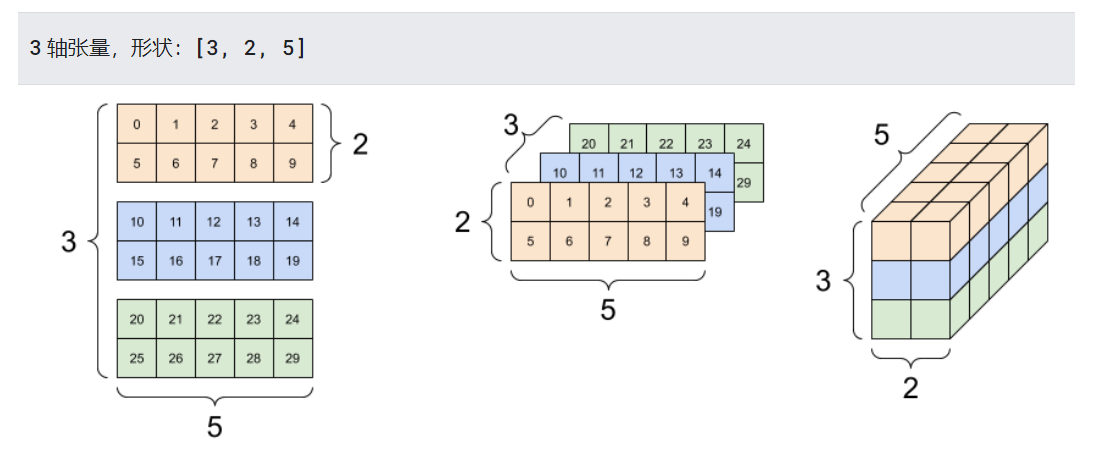

In [174]:
#>>>>>>>>>>>>>>>>>2、SHAPE>>>>>>>>>>>>>>>>>>>>>>>>>

##张量有形状。下面是几个相关术语：

#形状：张量的每个轴的长度（元素数量）。
#秩：张量轴数。标量的秩为 0，向量的秩为 1，矩阵的秩为 2。
#轴或维度：张量的一个特殊维度。
#大小：张量的总项数，即形状矢量元素的乘积
#注：虽然您可能会看到“二维张量”之类的表述，但 2 秩张量通常并不是用来描述二维空间。

rank_4_tensor = tf.zeros([3,2,4,5])
rank_4_tensor

<tf.Tensor: shape=(3, 2, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

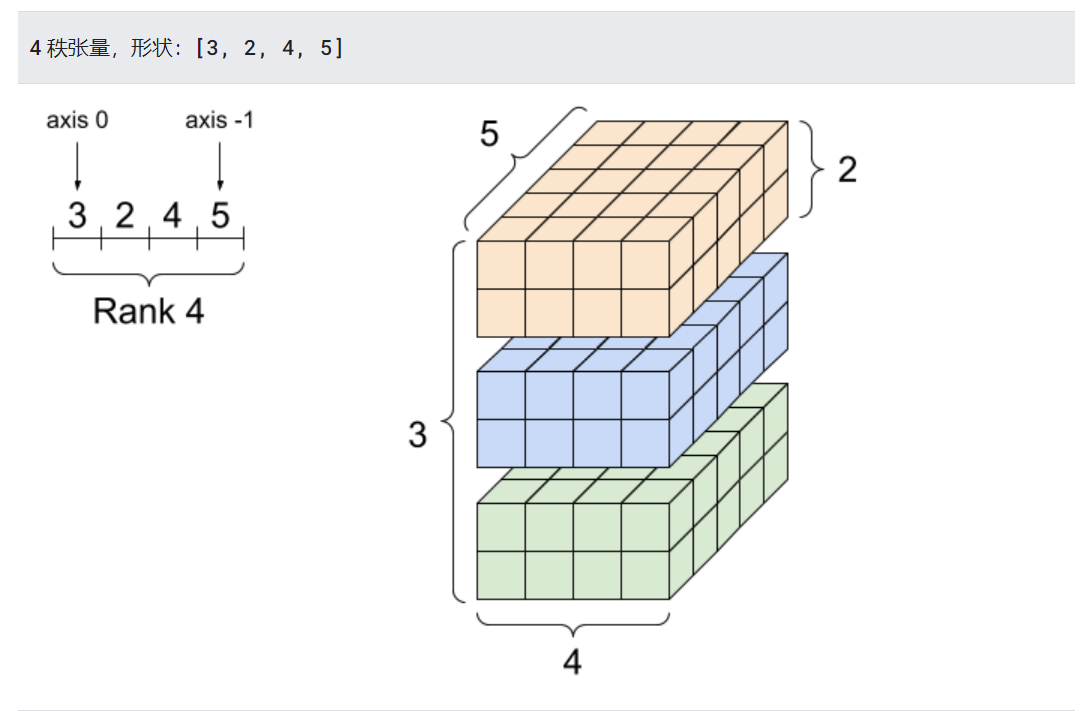

In [175]:
print("Type of every element:", rank_4_tensor.dtype)
print("Number of axes:", rank_4_tensor.ndim)
print("Shape of tensor:", rank_4_tensor.shape)
print("Elements along axis 0 of tensor:", rank_4_tensor.shape[0])
print("Elements along the last axis of tensor:", rank_4_tensor.shape[-1])
print("Total number of elements (3*2*4*5): ", tf.size(rank_4_tensor).numpy())

Type of every element: <dtype: 'float32'>
Number of axes: 4
Shape of tensor: (3, 2, 4, 5)
Elements along axis 0 of tensor: 3
Elements along the last axis of tensor: 5
Total number of elements (3*2*4*5):  120


In [176]:
#但请注意，Tensor.ndim 和 Tensor.shape 特性不返回 Tensor 对象。如果您需要 Tensor，请使用 tf.rank 或 tf.shape 函数。
# 这种差异不易察觉，但在构建计算图时（稍后）可能非常重要。
print(tf.rank(rank_4_tensor),'\n')
print(tf.shape(rank_4_tensor),'\n')

tf.Tensor(4, shape=(), dtype=int32) 

tf.Tensor([3 2 4 5], shape=(4,), dtype=int32) 



In [177]:
#虽然通常用索引来指代轴，但是您始终要记住每个轴的含义。轴一般按照从全局到局部的顺序进行排序：首先是批次轴，随后是空间维度，
# 最后是每个位置的特征。这样，在内存中，特征向量就会位于连续的区域。


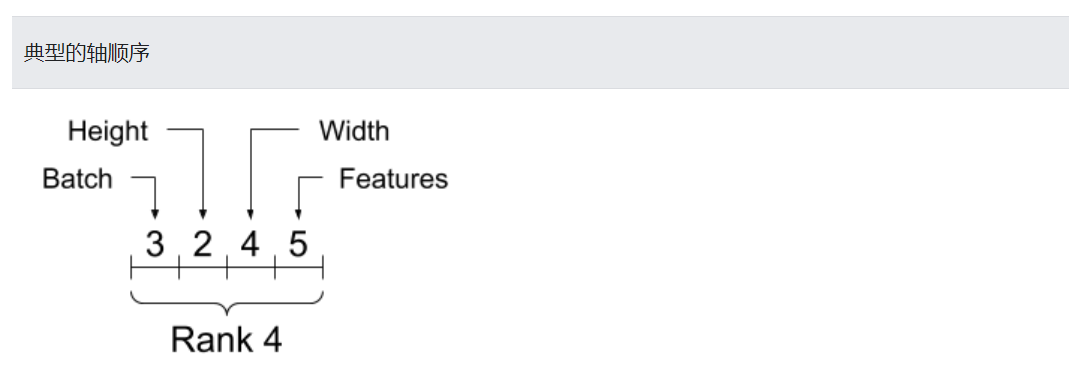

In [178]:
#>>>>>>>>>>>>>>>>>3、索引>>>>>>>>>>>>>>>>>>>>>>>>>
#单轴索引
#TensorFlow 遵循标准 Python 索引编制规则（类似于在 Python 中为列表或字符串编制索引）以及 NumPy 索引编制的基本规则。
#索引从 0 开始编制
#负索引表示按倒序编制索引
#冒号 : 用于切片：start:stop:step
rank_1_tensor = tf.constant([0,1,12,3,24,5])
print(rank_1_tensor)
print(rank_1_tensor[2].numpy())
print(rank_1_tensor[2:4].numpy())


tf.Tensor([ 0  1 12  3 24  5], shape=(6,), dtype=int32)
12
[12  3]


In [179]:
#多轴索引
#更高秩的张量通过传递多个索引来编制索引。

#对于高秩张量的每个单独的轴，遵循与单轴情形完全相同的规则。
print(rank_2_tensor,'\n')
print(rank_2_tensor[:,1],'\n')
print(rank_3_tensor,'\n')
print(rank_3_tensor[:,:,2],'\n')



tf.Tensor(
[[1. 2.]
 [3. 4.]
 [5. 6.]], shape=(3, 2), dtype=float16) 

tf.Tensor([2. 4. 6.], shape=(3,), dtype=float16) 

tf.Tensor(
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]], shape=(2, 2, 3), dtype=int16) 

tf.Tensor(
[[ 3  6]
 [ 9 12]], shape=(2, 2), dtype=int16) 



In [180]:
#>>>>>>>>>>>>>>>>>4、reshape>>>>>>>>>>>>>>>>>>>>>>>>>
#改变张量的形状很有用
# Shape returns a `TensorShape` object that shows the size along each axis
x = tf.constant([[1],[2],[3]])
print(x,"\n")
print(x.shape)


tf.Tensor(
[[1]
 [2]
 [3]], shape=(3, 1), dtype=int32) 

(3, 1)


In [181]:
# You can convert this object into a Python list, too
x.shape.as_list()

[3, 1]

In [182]:
#通过重构可以改变张量的形状。tf.reshape 运算的速度很快，资源消耗很低，因为不需要复制底层数据。
# You can reshape a tensor to a new shape.
# Note that you're passing in a list
reshaped = tf.reshape(x,[1,3])
reshaped

<tf.Tensor: shape=(1, 3), dtype=int32, numpy=array([[1, 2, 3]])>

In [183]:
#数据在内存中的布局保持不变，同时使用请求的形状创建一个指向同一数据的新张量。TensorFlow 采用 C 样式的“行优先”内存访问顺序，
# 即最右侧的索引值递增对应于内存中的单步位移。
rank_3_tensor

<tf.Tensor: shape=(2, 2, 3), dtype=int16, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]], dtype=int16)>

In [184]:
#如果您展平张量，则可以看到它在内存中的排列顺序。
# A `-1` passed in the `shape` argument says "Whatever fits".
tf.reshape(rank_3_tensor,[-1])

<tf.Tensor: shape=(12,), dtype=int16, numpy=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int16)>

In [185]:
#一般来说，tf.reshape 唯一合理的用途是用于合并或拆分相邻轴（或添加/移除 1）。
#对于 3x2x5 张量，重构为 (3x2)x5 或 3x(2x5) 都合理，因为切片不会混淆：
tf.reshape(rank_3_tensor,[3,4])

<tf.Tensor: shape=(3, 4), dtype=int16, numpy=
array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]], dtype=int16)>

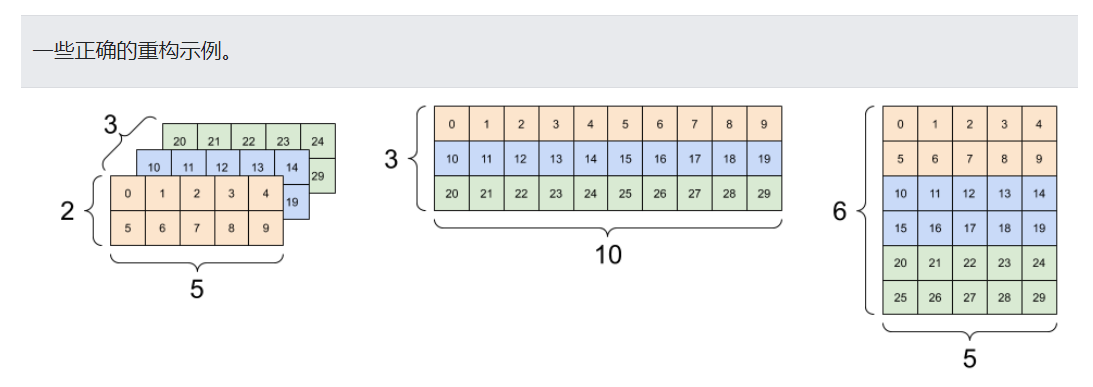

In [186]:
#重构可以处理总元素个数相同的任何新形状，但是如果不遵从轴的顺序，则不会发挥任何作用。
#利用 tf.reshape 无法实现轴的交换，要交换轴，您需要使用 tf.transpose。

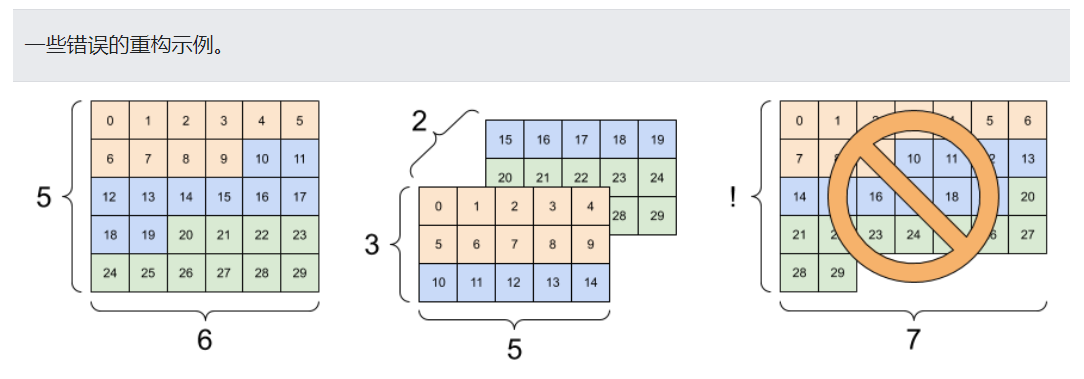

In [187]:
#>>>>>>>>>>>>>>>>>5、DTypes>>>>>>>>>>>>>>>>>>>>>>>>>
#使用 Tensor.dtype 属性可以检查 tf.Tensor 的数据类型。
#从 Python 对象创建 tf.Tensor 时，您可以选择指定数据类型。
#如果不指定，TensorFlow 会选择一个可以表示您的数据的数据类型。TensorFlow 将 Python 整数转换为 tf.int32，
# 将 Python 浮点数转换为 tf.float32。另外，当转换为数组时，TensorFlow 会采用与 NumPy 相同的规则。
#数据类型可以相互转换。

the_f64_tensor = tf.constant([2.1,3.2,4.3],dtype=tf.float64)
the_f16_tensor = tf.cast(the_f64_tensor,dtype=tf.float16)
print(the_f64_tensor,"\n")
print(the_f16_tensor,"\n")

tf.Tensor([2.1 3.2 4.3], shape=(3,), dtype=float64) 

tf.Tensor([2.1 3.2 4.3], shape=(3,), dtype=float16) 



In [188]:
#>>>>>>>>>>>>>>>>>6、广播>>>>>>>>>>>>>>>>>>>>>>>>>
#广播是从 NumPy 中的等效功能借用的一个概念。简而言之，在一定条件下，对一组张量执行组合运算时，为了适应大张量，会对小张量进行“扩展”。

#最简单和最常见的例子是尝试将张量与标量相乘或相加。在这种情况下会对标量进行广播，使其变成与其他参数相同的形状。
x = tf.constant([1,2,3])
y = tf.constant(2)
z = tf.constant([2,2,2])

# All of these are the same computation
print(tf.multiply(x,2),"\n")
print(x * y,"\n")
print(x * z,"\n")


tf.Tensor([2 4 6], shape=(3,), dtype=int32) 

tf.Tensor([2 4 6], shape=(3,), dtype=int32) 

tf.Tensor([2 4 6], shape=(3,), dtype=int32) 



In [189]:
#同样，可以扩展长度为 1 的轴，使其匹配其他参数。在同一个计算中可以同时扩展两个参数。

#在本例中，一个 3x1 的矩阵与一个 1x4 进行元素级乘法运算，从而产生一个 3x4 的矩阵。注意前导 1 是可选的：y 的形状是 [4]。
# These are the same computations
x = tf.reshape(x,[3,1])
y = tf.range(1, 5)
print(x, "\n")
print(y, "\n")
print(tf.multiply(x, y))

tf.Tensor(
[[1]
 [2]
 [3]], shape=(3, 1), dtype=int32) 

tf.Tensor([1 2 3 4], shape=(4,), dtype=int32) 

tf.Tensor(
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]], shape=(3, 4), dtype=int32)


In [190]:
#在大多数情况下，广播的时间和空间效率更高，因为广播运算不会在内存中具体化扩展的张量。

#使用 tf.broadcast_to 可以了解广播的运算方式。


In [191]:
#如果两个数组的后缘维度(从末尾开始算起的维度)的轴长度相符或其中一方的长度为1，则认为它们是广播兼容的。
# 广播会在缺失维度和(或)轴长度为1的维度上进行。

#在进行张量运算时，有些运算在处理不同shape的张量时，会隐式的自动调用Broadcasting机制，如+、-、*、/等运算，
# 将参与运算的张量Broadcasting成一个公共shape，再进行相应的计算。

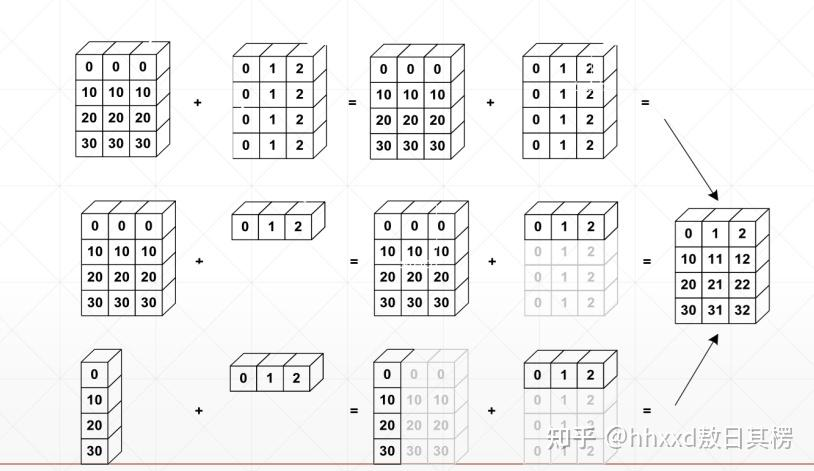

In [192]:
#>>>>>>>>>>>>>>>>>7、tf.convert_to_tensor>>>>>>>>>>>>>>>>>>>>>>>>>
#大部分运算（如 tf.matmul 和 tf.reshape）会使用 tf.Tensor 类的参数。不过，在上面的示例中，
# 您会发现形状类似于张量的 Python 对象也可以接受。

#大部分（但并非全部）运算会在非张量参数上调用 convert_to_tensor。我们提供了一个转换注册表，
# 大多数对象类（如 NumPy 的 ndarray、TensorShape、Python 列表和 tf.Variable）都可以自动转换。

x = np.array([1,2,3,4,5])
print(x,"\n")
y = tf.convert_to_tensor(x)
print(y)

[1 2 3 4 5] 

tf.Tensor([1 2 3 4 5], shape=(5,), dtype=int32)


In [193]:
#>>>>>>>>>>>>>>>>>8、不规则张量>>>>>>>>>>>>>>>>>>>>>>>>>
#如果张量的某个轴上的元素个数可变，则称为“不规则”张量。对于不规则数据，请使用 tf.ragged.RaggedTensor。
#例如，下面的例子无法用规则张量表示：


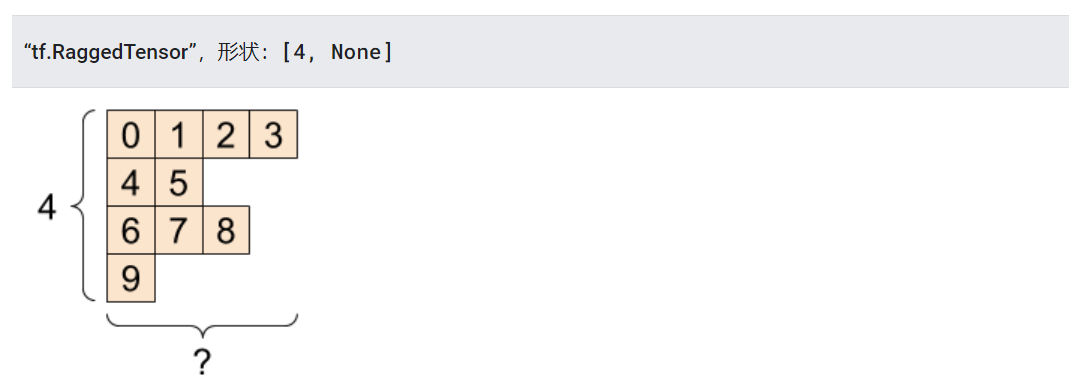

In [194]:
ragged_list = [
    [0, 1, 2, 3],
    [4, 5],
    [6, 7, 8],
    [9]]

try:
  tensor = tf.constant(ragged_list)
except Exception as e:
  print(f"{type(e).__name__}: {e}")


ValueError: Can't convert non-rectangular Python sequence to Tensor.


In [195]:
ragged_tensor = tf.ragged.constant(ragged_list)
ragged_tensor

<tf.RaggedTensor [[0, 1, 2, 3], [4, 5], [6, 7, 8], [9]]>

In [196]:
ragged_tensor.shape

TensorShape([4, None])

In [197]:
#>>>>>>>>>>>>>>>>>9、字符串张量>>>>>>>>>>>>>>>>>>>>>>>>>
#tf.string 是一种 dtype，也就是说，在张量中，您可以用字符串（可变长度字节数组）来表示数据。

#字符串是原子类型，无法像 Python 字符串一样编制索引。字符串的长度并不是张量的一个轴。
#下面是一个标量字符串张量：
# Tensors can be strings, too here is a scalar string.
scalar_string_tensor = tf.constant("Gray wolf")
scalar_string_tensor

#下面是一个字符串向量：

<tf.Tensor: shape=(), dtype=string, numpy=b'Gray wolf'>

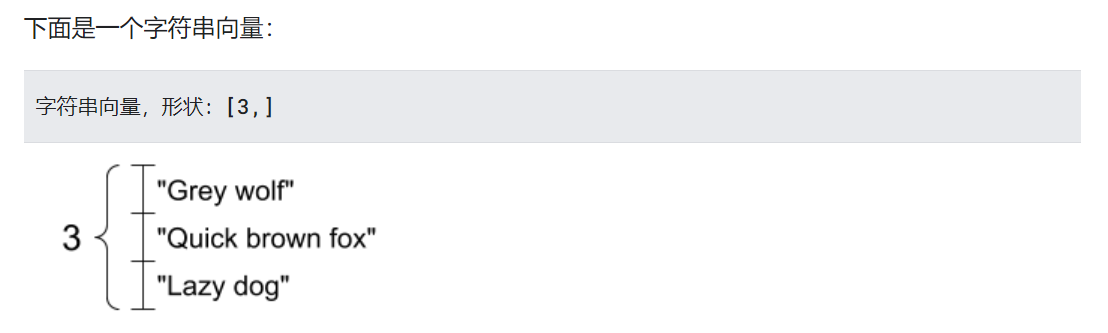

In [198]:
# If you have three string tensors of different lengths, this is OK.
tensor_of_strings = tf.constant(["Gray wolf",
                                 "Quick brown fox",
                                 "Lazy dog"])
# Note that the shape is (3,). The string length is not included.
tensor_of_strings

<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'Gray wolf', b'Quick brown fox', b'Lazy dog'], dtype=object)>

In [199]:
#在 tf.strings 中可以找到用于操作字符串的一些基本函数，包括 tf.strings.split。
# You can use split to split a string into a set of tensors
tf.strings.split(scalar_string_tensor,sep=' ')

<tf.Tensor: shape=(2,), dtype=string, numpy=array([b'Gray', b'wolf'], dtype=object)>

In [200]:
tf.strings.split(tensor_of_strings,sep=' ')

<tf.RaggedTensor [[b'Gray', b'wolf'], [b'Quick', b'brown', b'fox'], [b'Lazy', b'dog']]>

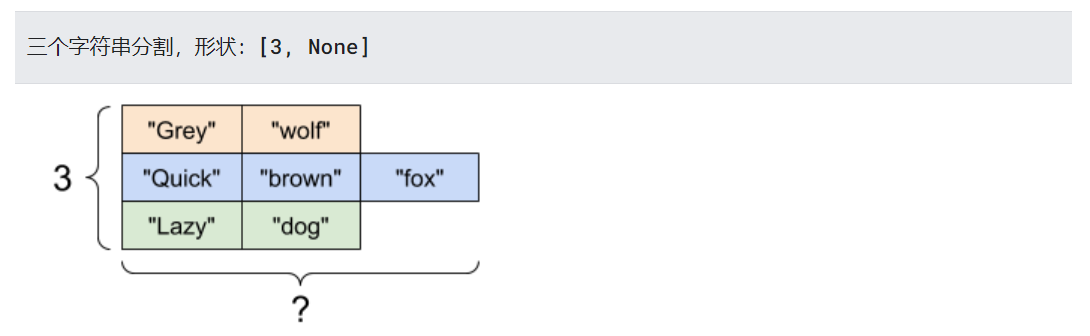

In [201]:
#以及 tf.string.to_number：
text = tf.constant("1 10 100")
tf.strings.to_number(tf.strings.split(text,sep=" "))

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([  1.,  10., 100.], dtype=float32)>

In [202]:
#虽然不能使用 tf.cast 将字符串张量转换为数值，但是可以先将其转换为字节，然后转换为数值。
byte_strings = tf.strings.bytes_split(tf.constant("duck"))
print(byte_strings,"\n")
byte_ints = tf.io.decode_raw(tf.constant("duck"),tf.uint8)
byte_ints

tf.Tensor([b'd' b'u' b'c' b'k'], shape=(4,), dtype=string) 



<tf.Tensor: shape=(4,), dtype=uint8, numpy=array([100, 117,  99, 107], dtype=uint8)>

In [203]:
#tf.string dtype 可用于 TensorFlow 中的所有原始字节数据。
# tf.io 模块包含在数据与字节类型之间进行相互转换的函数，包括解码图像和解析 csv 的函数。

In [204]:
#>>>>>>>>>>>>>>>>>10、稀疏张量>>>>>>>>>>>>>>>>>>>>>>>>>
#在某些情况下，数据很稀疏，比如说在一个非常宽的嵌入空间中。
# 为了高效存储稀疏数据，TensorFlow 支持 tf.sparse.SparseTensor 和相关运算。

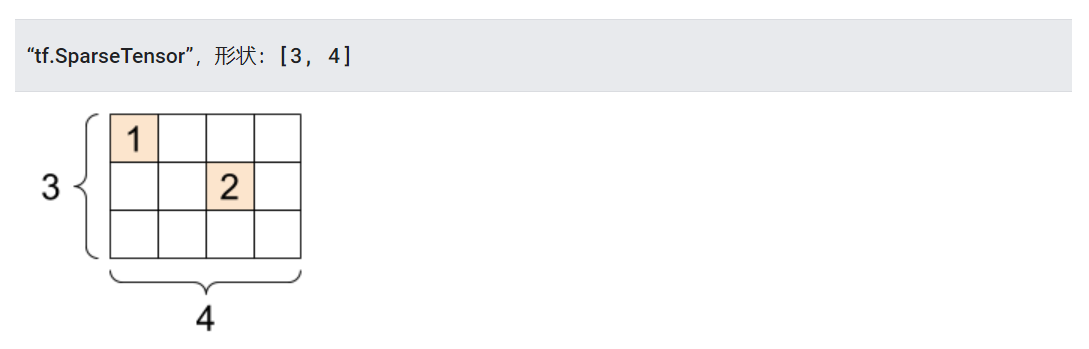

In [205]:
# Sparse tensors store values by index in a memory-efficient manner
sparse_tensor = tf.sparse.SparseTensor(
    indices = [[0,0],[1,2]],
    values = [1,2],
    dense_shape = [3,4]
)
sparse_tensor


SparseTensor(indices=tf.Tensor(
[[0 0]
 [1 2]], shape=(2, 2), dtype=int64), values=tf.Tensor([1 2], shape=(2,), dtype=int32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))

In [206]:
# You can convert sparse tensors to dense
tf.sparse.to_dense(sparse_tensor)


<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[1, 0, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 0]])>